# Machine Learning - Supervised Methods
# Error and Noise  +  Training Versus Testing

## 1. k-Nearest-Neighbor Classification

* ** a) Load the banana data set, split it 50/50 into training and test set, and apply *k*-nearest-neighbor classification (see http://scikit-learn.org/stable/modules/neighbors.html#classification and http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), with $k \in \{1, 3, 5, 7, 9, 19, 29, 49, 99, 199, 299, 499, 999\}$. Which value of $k$ works best? Compare to results you obtained previously with other methods on this data set. **

In [17]:
import numpy as np

def loadCSV(filename):
    f = open(filename)
    data = np.loadtxt(f, delimiter=',')
    X = data[:, 1:]  #vor dem Komma: Zeilen, nach dem Komma: Spalten
    y = data[:, 0]
    return X, y

X, y = loadCSV("banana.csv")
#splitting into training/testing set:
X_training = X[0:int(len(X)/2),:]
X_test = X[int(len(X)/2):,:]
y_training = y[0:int(len(y)/2)]
y_test = y[int(len(y)/2):]
print(X_test)
print(X_test[0])
print(np.apply_along_axis(sum, 1, X_test))  #Funktion auf alle Zeilen eines Arrays anwenden
print(sum(X_test[1]))
len(X_test)

[[ 0.20855328  0.75486181]
 [-0.6787846  -0.09570268]
 [-1.174657    0.12555182]
 ...
 [ 1.1302304   1.4797409 ]
 [-0.00633513 -1.0014036 ]
 [ 0.55423325  1.1879978 ]]
[0.20855328 0.75486181]
[ 0.96341509 -0.77448728 -1.04910518 ...  2.6099713  -1.00773873
  1.74223105]
-0.7744872829999999


2650

The shape of X is (5300, 2)
The shape of y is (5300,)


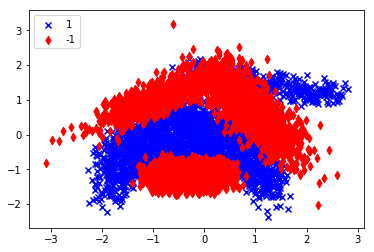

The above graphic displays the banana dataset.


In [3]:
import matplotlib.pyplot as plt
print("The shape of X is " + str(X.shape))
print("The shape of y is " + str(y.shape))
#visualizing the banana data set:
def column(matrix, i):
    return [row[i] for row in matrix]
def plot_separated(data, labels):
    conc_array=np.concatenate((data[:,0], data[:,1],labels)).reshape(3,len(data))
    true_array = [row for row in np.transpose(conc_array) if row[2]==1]
    false_array = [row for row in np.transpose(conc_array) if row[2]==-1]
    plt.scatter(column(true_array,0),column(true_array,1), c='b', marker='x', label='1')
    plt.scatter(column(false_array,0), column(false_array,1), c='r', marker='d', label='-1')
    plt.legend(loc='upper left')
    plt.show()
plot_separated(X,y)
print("The above graphic displays the banana dataset.")

In [16]:
#applying kNN:
import sklearn.neighbors as knn
from sklearn.neighbors import KNeighborsClassifier
values = [1,3,5,7,9,19,29,49,99,199,299,499,999]
error = []
for i in values:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_training, y_training)
    #print(neigh.predict([X_test[1],X_test[2],X_test[3]]))
    #pred = np.zeros(len(X_test))
    #for j in range(len(X_test)):
    #    pred[j] = neigh.predict([X_test[j]])
    pred = neigh.predict(X_test)
    print(pred)
    print(sum(abs(pred-y_test)/(2*len(y_test))))
    error.append(sum(abs(np.sign(pred-y_test))/(2*len(y_test))))
best_k = np.argmin(error)
print(values[best_k])

[ 1.  1.  1. ...  1. -1. -1.]
0.1347169811320758
[ 1.  1.  1. ...  1. -1. -1.]
0.11811320754717038
[ 1.  1.  1. ...  1. -1. -1.]
0.10603773584905708
[ 1.  1.  1. ...  1. -1. -1.]
0.09924528301886835
[ 1.  1.  1. ...  1. -1. -1.]
0.10226415094339668
[ 1.  1.  1. ...  1. -1. -1.]
0.10075471698113252
[ 1.  1.  1. ...  1. -1. -1.]
0.1015094339622646
[ 1.  1.  1. ...  1. -1. -1.]
0.10113207547169856
[ 1.  1.  1. ...  1. -1. -1.]
0.1033962264150948
[-1.  1.  1. ... -1. -1. -1.]
0.12641509433962322
[-1.  1.  1. ... -1. -1. -1.]
0.1558490566037733
[-1.  1.  1. ... -1. -1. -1.]
0.19735849056603622
[-1.  1.  1. ... -1. -1. -1.]
0.3305660377358436
7


In [12]:
#applying kNN:
import sklearn.neighbors as knn
from sklearn.neighbors import KNeighborsClassifier
values = [1,3,5,7,9,19,29,49,99,199,299,499,999]
error = []
neigh = KNeighborsClassifier(n_neighbors=i)
neigh.fit(X_training, y_training)
print(X_test)
print([X_test[1]])
print(neigh.predict([X_test[1]]))

[[ 0.20855328  0.75486181]
 [-0.6787846  -0.09570268]
 [-1.174657    0.12555182]
 ...
 [ 1.1302304   1.4797409 ]
 [-0.00633513 -1.0014036 ]
 [ 0.55423325  1.1879978 ]]
[array([-0.6787846 , -0.09570268])]
[1.]


In [6]:
#DO NOT RUN: perceptron does not converge since banana set is not linearly separable
#comparing to previous methods:
#perceptron:
import sys
def train_perceptron(X, y):
    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros(d)
    w0 = 0.0
    iter = 0
    sys.stdout.write("training on " + str(N) + " points ")
    while True:
        # progress output
        iter += 1
        if iter % 100 == 0:
            sys.stdout.write(".")
            sys.stdout.flush()
        # find a wrongly classified point
        found = False
        for i in range(N):
            if y[i] * (w0 + np.dot(w, X[i])) <= 0:
                found = True
                break
        # stop if there is no such point
        if not found:
            break
        # update the weight vector
        w0 += y[i]
        w += y[i] * X[i]
    print("finished in " + str(iter) + " iterations")
    return w0, w


w0, w = train_perceptron(X_training, y_training)
print(w0)
print(w)
#errors = 0
#for i in range(X_test.shape[0]):
#    if y_test[i] * (w0 + np.dot(w, X_test[i, :])) <= 0:
#        errors += 1
#print("error rate: " + str(errors / X_test.shape[0]))

training on 2650 points ................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

* **b) Visualize the above *k*-NN classifiers along the lines of this example http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html, but without plotting the data (the 'plt.scatter' command), and with a mesh resolution of 'h = 0.05'. For which values of $k$ do you observe overfitting, underfitting, and reasonable performance? **

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 2. Unbalanced Data Sets

** A classification problem is called *unbalanced* if the numbers of points differ considerably among the classes. Here we investigate the effect of unbalanced data. **

* ** a) Load the "breastcancer" data set from the moodle course. Split it 50/50 into training and test set. Print number of positive and negative training points. Create two further subsets of the training set: remove 90% of the +1 class in the first case, and remove 90% of the -1 class in the second case. In both cases, leave the other class as is.**

* **b) Train linear regression (misused as a classifier) on both sets. Measure the error rate on the test set, and compare to the error rate when training on the full set. Also check for both cases which *types* of errors the model makes, i.e., which class is wrongly classified how often. Interpret the result. **

* **c) Re-train the two linear regression models, but this time use the third parameter "sample_weight" of the "fit" method to give 10 times higher weight to training points of the class that was reduced by factor 10. This means that they count 10 times as much in the in-sample error, which is used for training. Check the error rates as in the previous task and compare the results. **

## 3. Dichotomies

* **a) Load the "banana" data set. Create 100 random linear hypothesis of the form $h(x) = \text{sign}(w^T x)$ as follows: $w_1 = 10$, $w_2 \in \mathcal{N}(0, 1)$ (normal distribution with mean 0 and variance 1). None of these will actually perform very well. Compute the number of different dichotomies realized by the 100 classifiers on the data. **

* **b) Repeat the experiment for 1000 and for 10000 hypotheses from the same distribution. Do you observe fast of slow growth of the number of dichotomies? **

* **c) Stick to 10000 hypotheses. Use subsets of the data of size $\{2, 4, 8, 16, 32, 64, 128, 256\}$ to compute the number of dichotomies. Does the number look as if it grows exponentially or rather like a low-order polynomial? **

## 4. The Growth Function

* **a) Consider Perceptrons on $\mathbb{R}$ and on $\mathbb{R}^2$. Where is the break point? Construct explicit examples where separation of all dichotomies fails. Guess a general rule for Perceptrons on $\mathbb{R}^d$. **

* ** b) Consider the input space $\mathbb{R}^2$ and binary classification with $Y = \{-1, +1\}$. On this space consider the hypothesis space $H$ of classifiers of the form
$$
    h(x) = \text{sign} \big( p(x) \big)
$$
where $p(x_1, x_2)$ is a polynomial of degree two. The class consists of classifiers with linear, parabolic, ellipsoidal and hyperbolic decision boundaries (solution sets of quadratic equations). Does this class have a break point $k$? If so, can you define or at least bound $k$?**
<br/><br/>
** Hint: After the feature transformation $(1, x_1, x_2) \mapsto (1, x_1, x_2, x_1^2, x_1 x_2, x_2^2)$ the classifier is linear. Use the result from part a). **